In [1]:
# import all of the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
car = pd.read_csv("C:\\Users\\visha\\Downloads\\Car_sales.csv")
car.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [3]:
# check for null values
car.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [4]:
# drop the null values
car = car.dropna(how = 'any')

In [5]:
# check for null values again
car.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [6]:
# determine the data types of the dataset
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 149
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         117 non-null    object 
 1   Model                117 non-null    object 
 2   Sales_in_thousands   117 non-null    float64
 3   __year_resale_value  117 non-null    float64
 4   Vehicle_type         117 non-null    object 
 5   Price_in_thousands   117 non-null    float64
 6   Engine_size          117 non-null    float64
 7   Horsepower           117 non-null    float64
 8   Wheelbase            117 non-null    float64
 9   Width                117 non-null    float64
 10  Length               117 non-null    float64
 11  Curb_weight          117 non-null    float64
 12  Fuel_capacity        117 non-null    float64
 13  Fuel_efficiency      117 non-null    float64
 14  Latest_Launch        117 non-null    object 
 15  Power_perf_factor    117 non-null    flo

In [7]:
# basic descriptive statistics
car.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,59.112316,18.031538,25.969487,3.048718,181.282051,107.326496,71.189744,187.717949,3.324051,17.812821,24.119658,74.930921
std,75.058933,11.605632,14.149699,1.055169,58.591786,8.050588,3.530151,13.849926,0.597177,3.794609,4.404470,25.771796
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,16.767000,11.240000,16.980000,2.200000,140.000000,102.400000,68.500000,177.500000,2.911000,15.300000,22.000000,55.297117
50%,32.299000,14.010000,21.665000,3.000000,175.000000,107.000000,70.400000,187.800000,3.340000,17.200000,24.000000,70.660942
75%,76.029000,19.875000,29.465000,3.800000,210.000000,111.600000,73.600000,196.500000,3.823000,19.800000,26.000000,85.828408
max,540.561000,67.550000,82.600000,8.000000,450.000000,138.700000,79.300000,224.500000,5.115000,32.000000,45.000000,188.144323


<AxesSubplot:xlabel='Price_in_thousands', ylabel='Sales_in_thousands'>

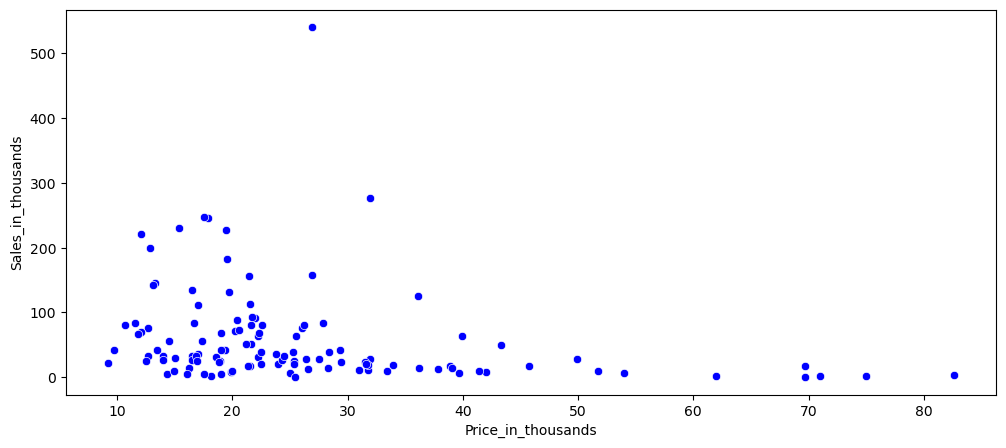

In [8]:
# scatterplot of price vs regular sales
x = car['Price_in_thousands']
y = car['Sales_in_thousands']
plt.figure(figsize=(12,5))
sns.scatterplot(x,y,color = 'blue')

<AxesSubplot:xlabel='__year_resale_value', ylabel='Sales_in_thousands'>

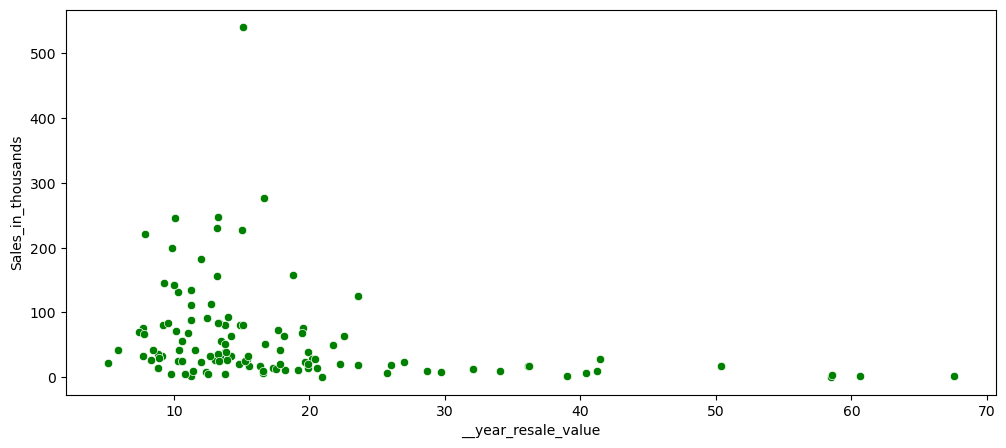

In [9]:
# scatterplot of yearly sales vs regular sales
x = car['__year_resale_value']
y = car['Sales_in_thousands']
plt.figure(figsize=(12,5))
sns.scatterplot(x,y,color = 'green')

<AxesSubplot:xlabel='Sales_in_thousands', ylabel='Density'>

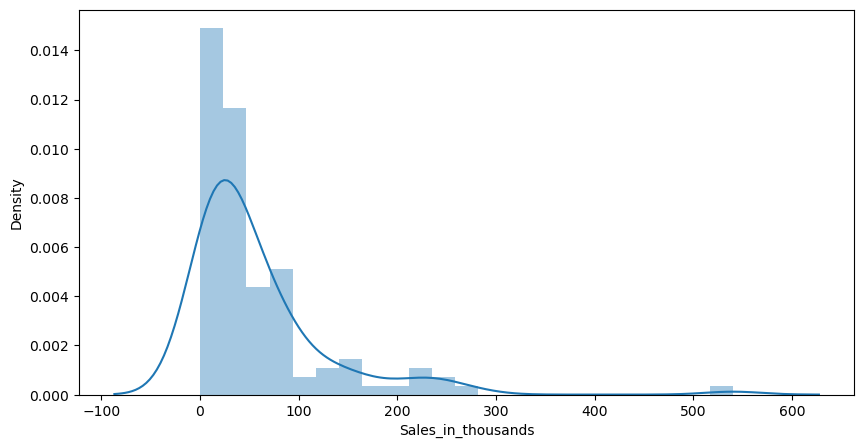

In [10]:
# histogram of sales in thousands
plt.figure(figsize=(10,5))
sns.distplot(car['Sales_in_thousands'])

<AxesSubplot:xlabel='Price_in_thousands', ylabel='Density'>

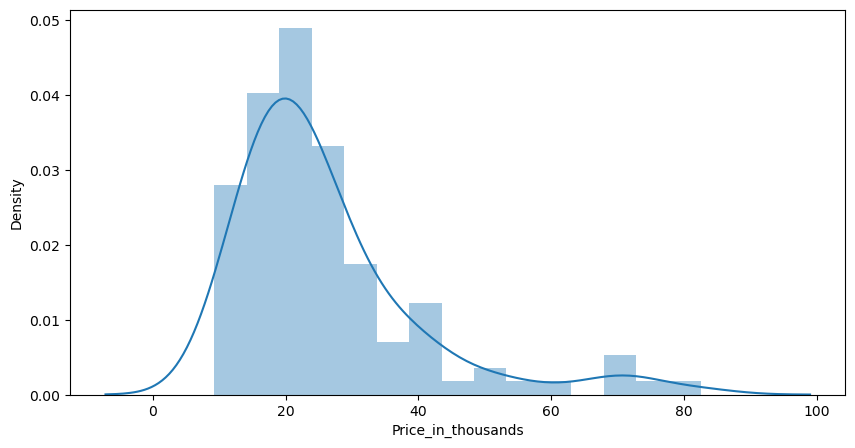

In [11]:
# histogram of price in thousands
plt.figure(figsize=(10,5))
sns.distplot(car['Price_in_thousands'])

<AxesSubplot:xlabel='__year_resale_value', ylabel='Density'>

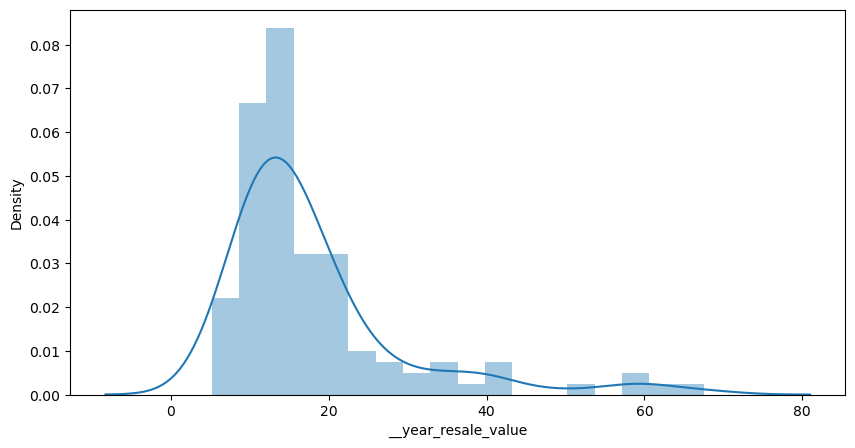

In [12]:
# histogram of yearly sales
plt.figure(figsize=(10,5))
sns.distplot(car['__year_resale_value'])

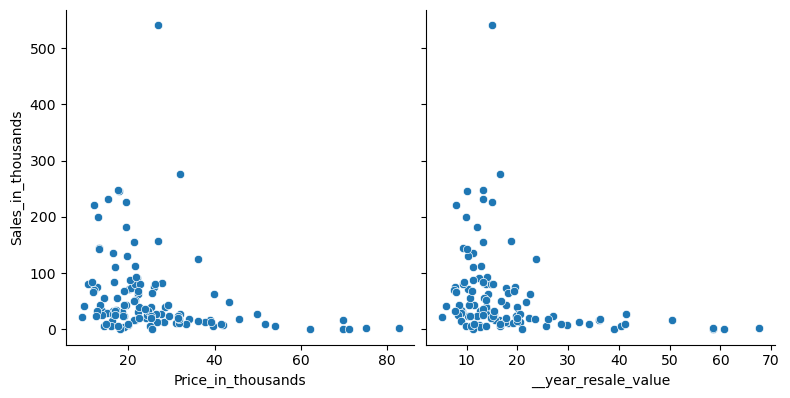

In [13]:
# plots of pairwise bivariate distributions
sns.pairplot(car, x_vars = ['Price_in_thousands','__year_resale_value'], y_vars = ['Sales_in_thousands'], height = 4, aspect = 1)
plt.show()

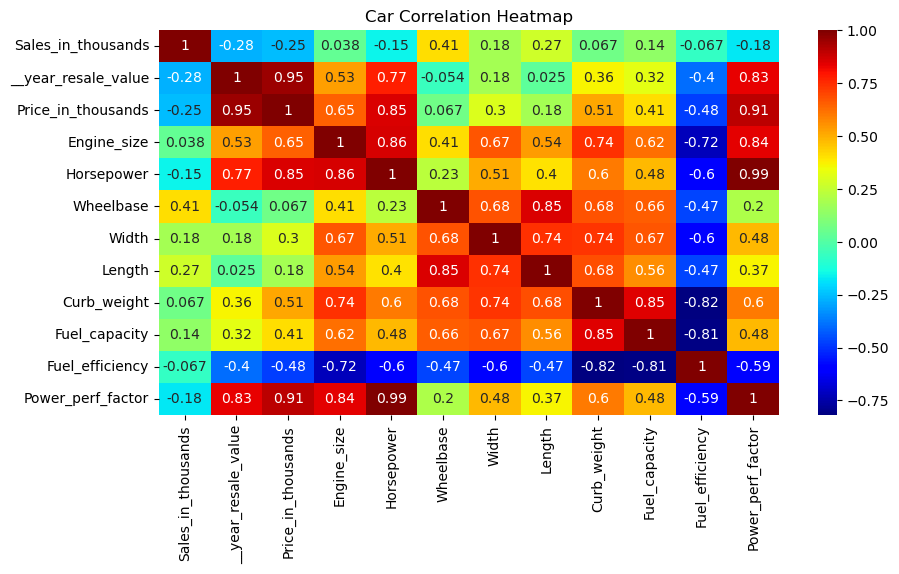

In [14]:
# create a heatmap of the correlation
plt.figure(figsize=(10,5))
sns.heatmap(car.corr(),annot = True, cmap = 'jet')
plt.title('Car Correlation Heatmap')
plt.show()

In [15]:
# standard deviation of the dataset
car.std()

Sales_in_thousands     75.058933
__year_resale_value    11.605632
Price_in_thousands     14.149699
Engine_size             1.055169
Horsepower             58.591786
Wheelbase               8.050588
Width                   3.530151
Length                 13.849926
Curb_weight             0.597177
Fuel_capacity           3.794609
Fuel_efficiency         4.404470
Power_perf_factor      25.771796
dtype: float64

In [16]:
# variance of the dataset
car.var()

Sales_in_thousands     5633.843458
__year_resale_value     134.690698
Price_in_thousands      200.213992
Engine_size               1.113382
Horsepower             3432.997347
Wheelbase                64.811964
Width                    12.461963
Length                  191.820451
Curb_weight               0.356620
Fuel_capacity            14.399058
Fuel_efficiency          19.399352
Power_perf_factor       664.185494
dtype: float64

In [17]:
# mean of the dataset
car.mean()

Sales_in_thousands      59.112316
__year_resale_value     18.031538
Price_in_thousands      25.969487
Engine_size              3.048718
Horsepower             181.282051
Wheelbase              107.326496
Width                   71.189744
Length                 187.717949
Curb_weight              3.324051
Fuel_capacity           17.812821
Fuel_efficiency         24.119658
Power_perf_factor       74.930921
dtype: float64

In [18]:
X = car[['__year_resale_value']] # independent variable
y = car['Price_in_thousands'] # dependent variable

In [19]:
# split the dataset into a training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8, random_state = 42)

In [20]:
# create linear regression object
# train the model using the training sets
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
# calculate the regression intercept
lr.intercept_

4.931246350452827

In [22]:
# calculate the regression coefficient
lr.coef_

array([1.15429597])

In [23]:
# display the linear regression equation
print(" The LR model is: Y =", lr.intercept_, "+", lr.coef_, "ratio")

 The LR model is: Y = 4.931246350452827 + [1.15429597] ratio


In [24]:
# calculate the accuracy score of the train dataset
lr.score(X_train,y_train)

0.9266121974253079

In [25]:
# calculate the accuracy score of the test dataset
lr.score(X_test,y_test)

0.7052357269946838

In [26]:
# create a predict test dataset
y_pred = lr.predict(X_test)
y_pred

array([32.14377393, 32.12068801, 13.96361235, 24.13873136, 28.23648206,
       25.48925764, 20.96441743, 16.80895192, 18.81165544, 20.35264056,
       16.53769237, 19.52154746, 25.48348616, 16.50306349, 18.23450745,
       23.81552848, 28.62317121, 18.11907785, 22.00905528, 15.55076931,
       29.10220404, 22.52271699, 24.06370212, 30.93176316])

In [27]:
# create the actual and predicted dataframe
diff = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
diff.head(5)

,Actual,Predicted
54,36.135,32.143774
5,33.950,32.120688
63,11.799,13.963612
52,31.930,24.138731
12,31.965,28.236482


In [28]:
# calculate the coefficient of R squared score
# calculate the mean absolute error
# calculate the mean squared error
# calculate the root mean squared error
R2 = r2_score(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [29]:
# display the accuracy score, mean absolute error, mean squared error, and root mean squared error
print('Accuracy : ', R2.round(2)*100,'%')
print('mae:', mae.round(2))
print('mse', mse.round(2))
print('rmse:', rmse.round(2))

Accuracy :  71.0 %
mae: 3.7
mse 20.4
rmse: 4.52


<AxesSubplot:xlabel='Price_in_thousands'>

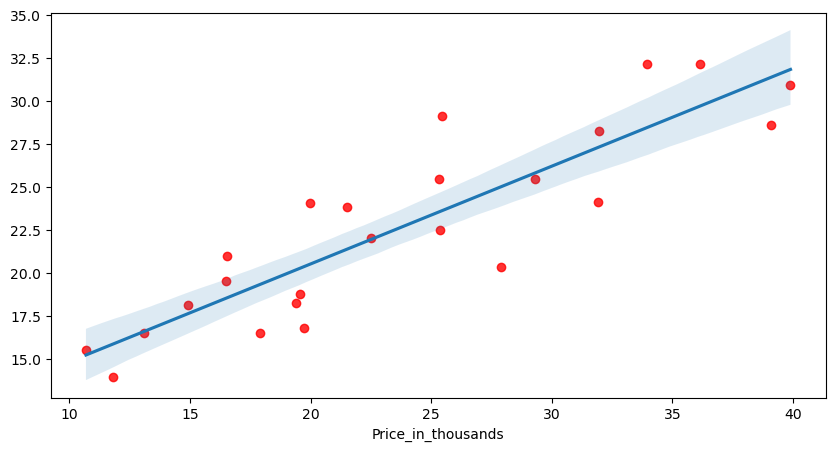

In [30]:
# plot the linear regression model fit
plt.figure(figsize=(10,5))
sns.regplot(x = y_test, y = y_pred, scatter_kws = {'color':'red'})